In [1]:
from taipy.gui import Gui
import requests
import pandas as pd

api_key = '10644614d71d570b8fb28c49378b7005'

# Define the FRED API endpoint
base_url = 'https://api.stlouisfed.org/fred/'

# Assign endpoint
obs_endpoint = 'series/observations'

### GDP

In [2]:
# Assign parameters
series_id = 'GDP'
start_date = '2000-01-01'
end_date = '2023-07-01'
ts_frequency = 'q'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    'frequency': ts_frequency
}

response = requests.get(base_url + obs_endpoint, params=obs_params)

if response.status_code == 200:
    res_data = response.json()
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    if obs_data['value'].dtype == object:
        try :
            obs_data['value'] = obs_data['value'].astype(float)
        except ValueError:
            print('Failed to convert to float')
    elif obs_data['value'].dtype == float:
        pass
else:
    print('Failed to retrieve data. Status code:', response.status_code)

print(obs_data.head())


  realtime_start realtime_end       date      value
0     2024-01-02   2024-01-02 2000-01-01  10002.179
1     2024-01-02   2024-01-02 2000-04-01  10247.720
2     2024-01-02   2024-01-02 2000-07-01  10318.165
3     2024-01-02   2024-01-02 2000-10-01  10435.744
4     2024-01-02   2024-01-02 2001-01-01  10470.231


In [3]:
print(obs_data['date'].iloc[0])
print(obs_data['value'].iloc[0])



2000-01-01 00:00:00
10002.179


In [4]:
# Create the desired dictionary
result_dict = {
    "x_col": obs_data["date"].tolist(),
    "y_col1": obs_data["value"].tolist()
}

print(result_dict)

{'x_col': [Timestamp('2000-01-01 00:00:00'), Timestamp('2000-04-01 00:00:00'), Timestamp('2000-07-01 00:00:00'), Timestamp('2000-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2001-04-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2001-10-01 00:00:00'), Timestamp('2002-01-01 00:00:00'), Timestamp('2002-04-01 00:00:00'), Timestamp('2002-07-01 00:00:00'), Timestamp('2002-10-01 00:00:00'), Timestamp('2003-01-01 00:00:00'), Timestamp('2003-04-01 00:00:00'), Timestamp('2003-07-01 00:00:00'), Timestamp('2003-10-01 00:00:00'), Timestamp('2004-01-01 00:00:00'), Timestamp('2004-04-01 00:00:00'), Timestamp('2004-07-01 00:00:00'), Timestamp('2004-10-01 00:00:00'), Timestamp('2005-01-01 00:00:00'), Timestamp('2005-04-01 00:00:00'), Timestamp('2005-07-01 00:00:00'), Timestamp('2005-10-01 00:00:00'), Timestamp('2006-01-01 00:00:00'), Timestamp('2006-04-01 00:00:00'), Timestamp('2006-07-01 00:00:00'), Timestamp('2006-10-01 00:00:00'), Timestamp('2007-01-01 00:00:00'), Tim

In [5]:
#export dateset out
obs_data.to_csv('fred-gdp-q.csv')

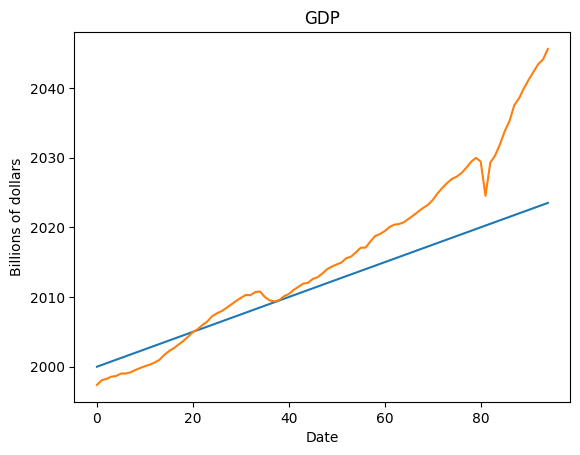

In [6]:
plot = obs_data.plot(title='GDP', legend=False)
plot.set_xlabel('Date')
plot.set_ylabel('Billions of dollars')
plot.figure.savefig('fred-gdp-q.png')

### CPIAUCSL

In [7]:
# Assign parameters
series_id = 'CPIAUCSL'
start_date = '2000-01-01'
end_date = '2023-07-01'
ts_frequency = 'm'

obs_params = {
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date,
    'frequency': ts_frequency
}

response = requests.get(base_url + obs_endpoint, params=obs_params)

if response.status_code == 200:
    res_data = response.json()
    print(res_data.keys())
    obs_data = pd.DataFrame(res_data['observations'])
    obs_data['date'] = pd.to_datetime(obs_data['date'])
    obs_data.set_index('date', inplace=True)
    obs_data['value'] = obs_data['value'].astype(float)
else:
    print('Failed to retrieve data. Status code:', response.status_code)

print(obs_data.head())

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])
           realtime_start realtime_end  value
date                                         
2000-01-01     2024-01-02   2024-01-02  169.3
2000-02-01     2024-01-02   2024-01-02  170.0
2000-03-01     2024-01-02   2024-01-02  171.0
2000-04-01     2024-01-02   2024-01-02  170.9
2000-05-01     2024-01-02   2024-01-02  171.2


In [8]:
#drop realtime_start and realtime_end
obs_data.drop(['realtime_start', 'realtime_end'], axis=1, inplace=True)

print(obs_data.head())

            value
date             
2000-01-01  169.3
2000-02-01  170.0
2000-03-01  171.0
2000-04-01  170.9
2000-05-01  171.2


In [9]:
# export dateset out
obs_data.to_csv('fred-cpiaucs-m.csv')

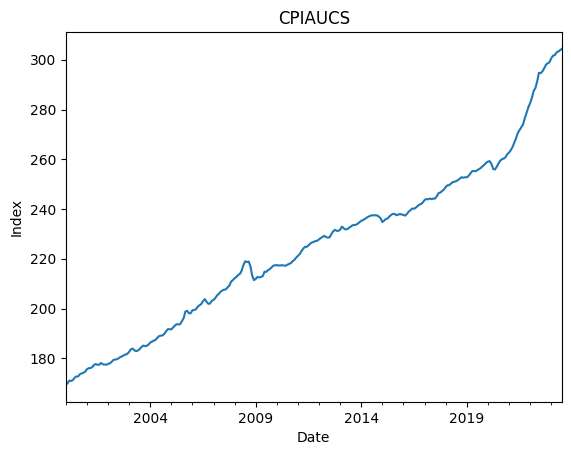

In [10]:
# plot
plot = obs_data.plot(title='CPIAUCS', legend=False)
plot.set_xlabel('Date')
plot.set_ylabel('Index')
plot.figure.savefig('fred-cpiaucs-m.png')

In [21]:
import requests

# Replace 'YOUR_API_KEY' with your actual FRED API key
api_key = '10644614d71d570b8fb28c49378b7005'
series_id = 'GDP'
url = f'https://api.stlouisfed.org/fred/series?series_id={series_id}&api_key={api_key}&file_type=json'

# Make the request
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()
    
    # Extract the frequency from the response
    if 'seriess' in data and data['seriess']:
        first_series = data['seriess'][0]
        frequency = first_series.get('frequency')

        if frequency:
            print(f"The frequency is: {frequency}")
        else:
            print("Frequency information not available in the API response.")
    else:
        print("No series data found in the API response.")
else:
    print(f"Error: {response.status_code}")
    print(response.text)


The frequency is: Quarterly
